In [2]:
from fastai.vision.all import *

%matplotlib inline
SEED = 42

In [3]:
path = untar_data(URLs.PETS)
path

Path('/home/jan/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

(#2) [Path('/home/jan/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jan/.fastai/data/oxford-iiit-pet/images')]

/home/jan/miniconda3/envs/pytorch-cpu/lib/python3.11/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


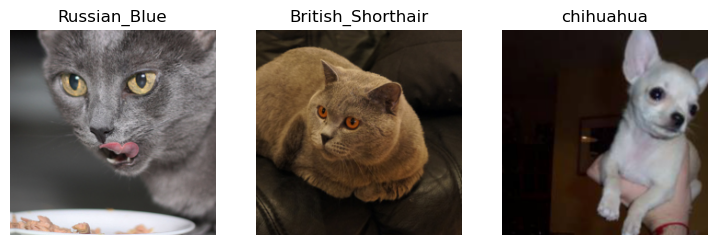

In [5]:
# create dataset
pets_db = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    splitter=RandomSplitter(seed=SEED),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
pets = pets_db.dataloaders(path/'images')
pets.show_batch(nrows=1, ncols=3)

In [6]:
# Baseline model
learn = vision_learner(pets, resnet18, metrics=error_rate)
learn.fine_tune(2)

SuggestedLRs(valley=0.0006918309954926372)

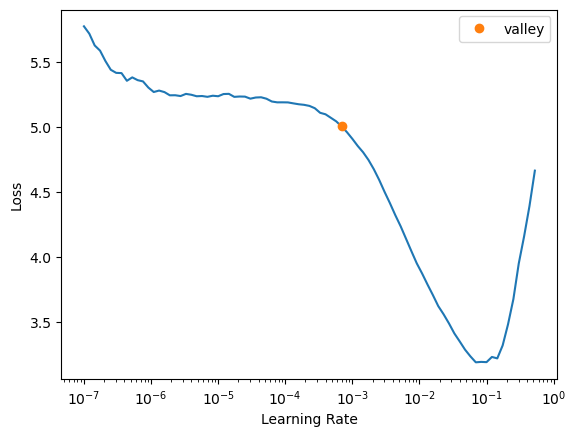

In [18]:
# Find better lr
learn = cnn_learner(pets, resnet18, metrics=error_rate)
lr_opt = learn.lr_find()
lr_opt

In [19]:
learn.fit_one_cycle(3, 0.00069)

KeyboardInterrupt: 

In [ ]:
lr_opt = learn.lr_find()
lr_opt

In [ ]:
learn.fit_one_cycle(12, lr_max=slice(TODO, TODO))